# FYS-STK4155 - Project 1

## By Jørn Marcus Høylo Rosenberg and Andreas Dyve

This Notebook contains both the code for the project and the report. The notebook is structured with each exercise in its own cell(s). This leads to some repeting code, but is practical for the purpose of evaluating each task seperately. (eller noe i denne duren? Fin den)

### Table of Contents

* [1. Imported libraries](#imports)
* [2. Functions used throughout the project](#functions)
    * [2.1. Franke function](#frankefunction)
    * [2.2. Cost functions](#costfunctions) 
    * [2.3. Design matrix function](#Xfunction)
    * [2.4. Scaling function](#scalefunction)
* [3. Exercise 1](#3)
    * [3.1. OLS regression](#3.1)
    * [3.2. Confidence intervals](#3.2)
    * [3.3. Discussion on scaling](3.3)
* [4. Exercise 2](#4)
    * [4.1. OLS regression with bootstrap](#4.1)
    * [4.2. bias-variance trade-off](#4.2)
* [5. Exercise 3](#5)
    * [5.1. OLS regression with cross-validation](#5.1)
    * [5.2. Comparison with bootstrap](#5.2)
* [6. Exercise 4](#6)
    * [6.1. Ridge regression with bootstrap and cross-validation](#6.1)
    * [6.2. Discussion of lambda](#6.2)
* [7. Exercise 5](#7)
    * [7.1 Lasso regression with bootstrap and cross-validation](#7.1)
    * [7.2 Evaluation of models](#7.2)
* [8. Exercise 6](#8)

### 1. Imported libraries <a class="anchor" id="imports"></a>

In [2]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.utils import resample

## Franke function
- Add plot of Franke function

### 2. Functions used throughout the project <a class="anchor" id="functions"></a>

The following functions are used for much of the repetative tasks in this project

#### 2.1. Error functions <a class="anchor" id="errorfunctions"></a>

In [3]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#### 2.2. Franke function <a class="anchor" id="frankefunction"></a>

The provided code in the exercise set is used for making of the Franke function.

In [4]:
def FrankeFunction(x,y,noise_coef):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = noise_coef * np.random.randn(N*N)
    return term1 + term2 + term3 + term4 + noise

#### 2.3. Design matrix function <a class="anchor" id="Xfunction"></a>

The provided code is used for computing the design matrix

In [5]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of columns in beta
    X = np.ones((N,l)) 

    for i in range(1,n+1):
        q = int((i)*(i+1)/2) 
        for k in range(i+1): 
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

#### 2.4. Scaling function <a class="anchor" id="scalefunction"></a>

In [6]:
def scale(X_train, X_test, z_train, z_test):
    scaler = StandardScaler() # Utilizing scikit's standardscaler

    scaler_x = scaler.fit(X_train) # Scaling x-data
    X_train_scaled = scaler_x.transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    scaler_z = scaler.fit(z_train.reshape(-1,1)) # Scaling z-data
    z_train_scaled = scaler_z.transform(z_train.reshape(-1,1)).ravel()
    z_test_scaled = scaler_z.transform(z_test.reshape(-1,1)).ravel()

    return X_train_scaled, X_test_scaled, z_train_scaled, z_test_scaled

## 3. Exercise 1: OLS on the Franke function <a class="anchor" id="3"></a>

The goal of this task is to do an OLS regression analysis of the Franke function for a polynomial degree up to 5.

#### 3.1. OLS regression code <a class="anchor" id="3.1"></a>

The following code creates the dataset and does an OLS regression analysis.

In [25]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

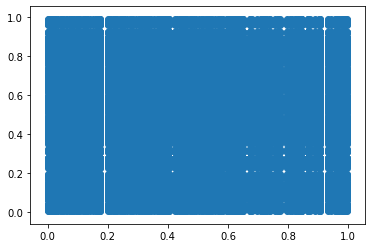

In [134]:
np.random.seed(64)
maxdegrees = 5
N = 200
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh) 
y_flat = np.ravel(y_mesh)

plt.scatter(x_flat, y_flat)
plt.show()

- Is it really justified to only use 20x20 points, we clearly see that this does not cover the entire mesh of x,y [0,1]. A qualitative study should requiere a min of 100x100 points. Burde vi ta den diskusjonen her, eller senere? Har nevnt det litt under også ettersom vi bruker 20x20 egt hele veien herifra

Results for ordinary least squares method
Degree: 0   mse train: 1.000000   mse test: 1.440723   r2_train: 0.000000   r2 test: -0.007569
Degree: 1   mse train: 0.552123   mse test: 0.525735   r2_train: 0.447877   r2 test: 0.537482
Degree: 2   mse train: 0.468758   mse test: 0.535676   r2_train: 0.531242   r2 test: 0.619697
Degree: 3   mse train: 0.274178   mse test: 0.417494   r2_train: 0.725822   r2 test: 0.556697
Degree: 4   mse train: 0.273511   mse test: 0.294854   r2_train: 0.726489   r2 test: 0.625667
Degree: 5   mse train: 0.258712   mse test: 0.365581   r2_train: 0.741288   r2 test: 0.702094

 Standard deviation and mean value of X_train and z_train, degree = 5
0.9759000729485332 1.7129155237073845e-16
1.0 -1.0685896612017132e-16




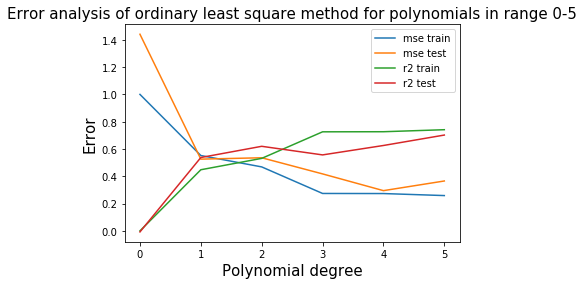

In [127]:
# Making meshgrid of datapoints and compute Franke's function
np.random.seed(64)

maxdegrees = 5 #Max degree of polynomial fit
N = 20 #Total datapoints
ts = 0.2 #Size of train test split
printData = False #Change to print X_train and z_train
scaling = True #Change to try without scaling

x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh) 
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15) #Change the third argument to vary the amount of stoicrastic noise

polydegree = np.zeros(maxdegrees+1)
r2_train = np.zeros(maxdegrees+1)
r2_test = np.zeros(maxdegrees+1)
mse_train = np.zeros(maxdegrees+1)
mse_test = np.zeros(maxdegrees+1)

# OLS regression for polynomials from 0 to maxdegrees
print("Results for ordinary least squares method")
for i in range(maxdegrees+1):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=ts)
    
    if (scaling == True):
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test) #Scale data with standard scaler
        
    # prediction
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    zTilde = X_train @ beta
    zPredict = X_test @ beta
    
    # cost functions
    r2_train[i] = r2_score(z_train, zTilde) #Error analysis from error functions from lecture notes
    r2_test[i] = r2_score(z_test, zPredict)
    mse_train[i] = MSE(z_train, zTilde) 
    mse_test[i] = MSE(z_test, zPredict)
    
    print('Degree: %i   mse train: %.6f   mse test: %.6f   r2_train: %.6f   r2 test: %.6f'\
          %(degree, mse_train[i], mse_test[i], r2_train[i], r2_test[i]))

    
if (printData == True):
    print("\n", "X_train:", "\n")
    print(X_train, "\n")
    print("X_train shape: {}".format(X_train.shape))
    print("\n", "Z_train:", "\n", z_train, "\n")
    print("z_train shape: {}".format(z_train.shape), "\n")

    
print("\n", "Standard deviation and mean value of X_train and z_train, degree = %i"%degree)
print(np.std(X_train), np.mean(X_train))
print(np.std(z_train), np.mean(z_train))
print("\n")    

plt.plot(polydegree, mse_train, label='mse train')
plt.plot(polydegree, mse_test, label='mse test')
plt.plot(polydegree, r2_train, label='r2 train')
plt.plot(polydegree, r2_test, label='r2 test')
plt.title("Error analysis of ordinary least square method for polynomials in range 0-5")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend()
plt.show()

From the printouts, its clear by both the R2 score and the mean squared error (MSE). that our polynomial fit impoves drasticly by improving the number of complexity to a maximum of 5. We will see later on that this trend does not traverse endlessly. In addition, normal distrobuted noise has a large impact on the model fit, anything above a std of 0.5 for the noise result in terrible MSE and R2-score, a lower degree of noise does affect the fit, but only marginal in comparisson. For the remainder of the project, we will mostly apply a stoicrastic noise with standard deviation of 0.15, and a dataset consiting of 20x20 points. The value of the meshgrid is choosen as small to better visualize various effects and properties, all though not exactly realistic. 

A suprising result from this model is that when we study the dependence of scaling the data. A scaled dataset results in the MSE beginning at 1 and gradually lowering to around 0.25, which is a decent result. However, the intial unscaled data yields a significantly lower MSE of our model fit, beginig at close to 0, and shrinking even more as the polynomial degree increase. Given that a fit of degree 0, is not an accurate description of a 5th order polynomial, this must be incorrect.   

In this exercise we decided to apply the StandardScaler() functionality included in Scikit-learn to scale the data of the design matrix X and the output z in a consistent matter. This function works by subtracting the sample mean from each datapoint and dividing by the standard deviation, providing a new dataset with mean value 0, and standard deviation 1, as seen in the printouts for polynomial degree 5. The scaling was implemented by fitting a scaler to the train data exclusivly, in order to maintain the stoicrastic nature of the data. Somewhat suprinsingly, scaling this dataset resulted in a massive difference in the model evaluation, even though the data was normalized between 0 and 1 initially. When printing out the data (printData = True), we see that the x-data in particular vary largly, up to 10^5 between various datapoints. This results in a weight beeing added to each points representing a priority or importance for the model. This is not desirable when implementing a regression model. By applying the standard scaling method, this problem is efficintly resolved, and we see a way more realistic outcome of our model fit. 


#### 3.2. Confidence intervals <a class="anchor" id="3.2"></a>

- $\mu_{\beta} \pm \frac{2\sigma_{\beta}}{\sqrt{n}}$

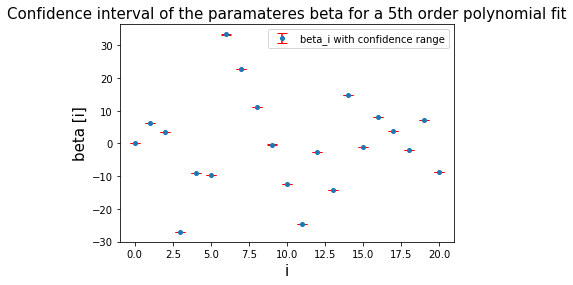

,Beta,+-
0,0.000000,0.000000
1,6.330254,0.003840
2,3.495914,0.003886
3,-27.017309,0.019153
4,-8.958082,0.010503
5,-9.703316,0.019303
6,33.341686,0.040857
7,22.765117,0.020236
8,11.019176,0.020060
9,-0.339818,0.040978


In [28]:
_str = len(beta)
variance = np.zeros(_str)
CI = np.zeros(_str)

for i in range(_str):
    variance[i] = 0.1**2 * np.linalg.pinv(X_train.T @ X_train)[i,i]
    CI[i] = 2*np.sqrt(variance[i])/np.sqrt(N)

print("")
plt.errorbar(np.arange(0,_str), beta, yerr=CI, fmt='o', ecolor='red', capsize=5, markersize=4, label='beta_i with confidence range')
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.legend()
plt.title("Confidence interval of the paramateres beta for a 5th order polynomial fit")
plt.show()

table = pd.DataFrame({'Beta': beta, '+-': CI})
table

#### 3.3 Discussion on scaling <a class="anchor" id="3.3"></a>

### 4. Exercise 2 - Bias-variance trade-off and resampling techniques 
<a class="anchor" id="4"></a>


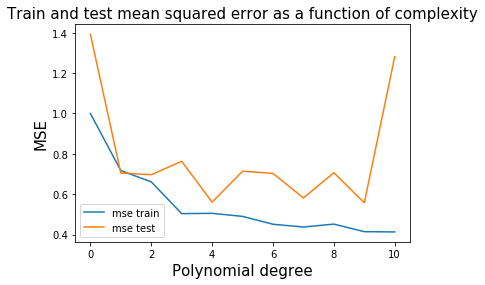

In [81]:
np.random.seed(64)

N = 20 #Small mesh size
maxdegrees = 11
scaling = True #Change to try without scaling

x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh) 
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.25) #Change the third argument to vary the amount of stoicrastic noise

mse_train = np.zeros(maxdegrees)
mse_test = np.zeros(maxdegrees)

# OLS regression for polynomials from 0 to maxdegrees
polydegree = np.zeros(maxdegrees)
for i in range(maxdegrees):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    
    if (scaling == True):
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test) #Scale data with standard scaler
        
    # prediction
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    zTilde = X_train @ beta
    zPredict = X_test @ beta
    
    # cost functions
    mse_train[i] = MSE(z_train, zTilde) 
    mse_test[i] = MSE(z_test, zPredict)

plt.plot(polydegree, mse_train, label='mse train')
plt.plot(polydegree, mse_test, label='mse test')
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("Train and test mean squared error as a function of complexity")
plt.show()

From the figure above, the test data imply a region of high variance from polynomial degree 8 and upwards.

### Bootstrap: 
- Change train, test split: V
- Change datapoints: V
- Derive expression: 
- Brief summary of what the terms mean: V
- Why does the bias decrease, but var increase?: V 
- What is the effect of many/few datapoints (Dyve): 

#### 4.1. OLS regression with bootstrap resampling <a class="anchor" id="4.1"></a>

                 MSE         Bias      Variance
degree: 0      1.4407       1.4407      0.0000
degree: 1      0.5827       0.5797      0.0030
degree: 2      0.5599       0.5524      0.0075
degree: 3      0.2869       0.2710      0.0159
degree: 4      0.3324       0.3148      0.0176
degree: 5      0.4372       0.3745      0.0627
degree: 6      0.2672       0.2447      0.0226
degree: 7      0.3934       0.3323      0.0611
degree: 8      0.4674       0.3728      0.0946
degree: 9      1.8367       0.5225      1.3142
degree: 10      3.9732       0.5848      3.3884
degree: 11      3.4979       0.7771      2.7209



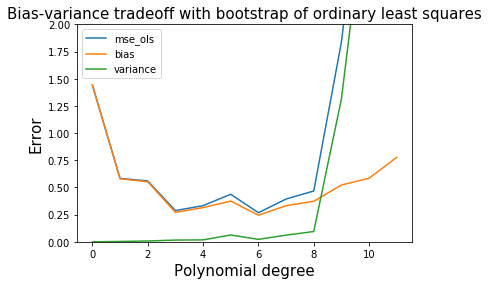

In [108]:
# Parameters

N = 20 # Change to alter total datapoints
ts = 0.2 #Change to alter train, test size

n_bootstraps = 1000 #Number of bootstraps
maxdegree = 12

# Create data
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15)

# Cost functions
mse = np.zeros(maxdegree)
r2 = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

polydegree = np.zeros(maxdegree)
print("                 MSE         Bias      Variance")
for i in range(maxdegree):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)

    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=ts)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)

    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train, z_train)
        beta_ols = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        z_pred[:,j] = X_test @ beta_ols
    
    mse[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2)
    variance[i] = np.mean(np.var(z_pred, axis=1, keepdims=True))
    
    print('degree: %i      %.4f       %.4f      %.4f'%(degree, mse[i], bias[i], variance[i])) 
    
print("")
plt.plot(polydegree, mse, label='mse_ols')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='variance')
plt.title("Bias-variance tradeoff with bootstrap of ordinary least squares")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.ylim(0,2)
plt.legend()
plt.show()

#### 4.2. Discussion of bias-variance trade-off <a class="anchor" id="4.2"></a>

The mean squared error of our model is described by the sum of the bias and variance of the model, in addition to the added stoicrastic noise in the following relation: 

$$
MSE = \frac{1}{n}\sum_i (y_i - \mathbb{E} |\tilde{y}|)^2 + \frac{1}{n}\sum_i (\tilde{y_i} - \mathbb{E} |\tilde{y}|)^2 + \sigma^2
$$

where the first term represent the bias squared, the second the model variance and lastly $ \sigma^2 $ to denote the error originating from the noise. The bias of the model is a meassure of how accuarate our model approximation is to the original problem, while the variance is usefull to meassure how our model fluxates in performence depending on the input data. Another way to define the model variance is how sensetive the model is on the traing data used. 

A common problem in machine learning algoritms is the bias-variance tradeoff, ie finding the appropriate model to minimize simantainously the bias and variance of the model. In this example we see that a polynomial of degree 6 is the best we can do. Beyond this point the variance and thus MSE explode to larger values, in a problem known as overfitting, or making our model to complex. The opposite, underfitting is present in polynomial degrees bellow 2, in this case the model bias is large, as obviosly a 1st or 2nd degree polynomial is a bad model of a 5th order problem. The overfitting problem occurs becouse our model is designed very orecicly for a given problem, set of data, therefore, when altering the test data, our complex model does a terrible job adjusting. 

The bias-variance tradeoff is also largly dependent on the amount of data used for training and testing, a larger training set corresponds to a overall better model, and vice versa in the opposite case. 
When increasing the amount of datapoints in total, this explosion of the model variance does not apper to take place. However this is not the case, as the variance also in this case does in facr increase in increasing complexity, and the bias converge to a low variance. But given the amount of points, the value of the variance is simply to low compared to the bias to effectivly impact the mean squared error in any significant way. **Dyve må skrive noe om den flotte figuren sin, angående antall datapunkter.**

### 5. Exercise 3 - Cross validation as resampling technique, adding more complexity 
<a class="anchor" id="5"></a>

#### 5.1. OLS regression with cross-validation resampling <a class="anchor" id="5.1"></a>

degree: 0    MSE: 1.014967
degree: 1    MSE: 0.543536
degree: 2    MSE: 0.460891
degree: 3    MSE: 0.327560
degree: 4    MSE: 0.314723
degree: 5    MSE: 0.298608
degree: 6    MSE: 0.283374
degree: 7    MSE: 0.293943
degree: 8    MSE: 0.320473
degree: 9    MSE: 0.368813
degree: 10    MSE: 0.451569
degree: 11    MSE: 0.619822


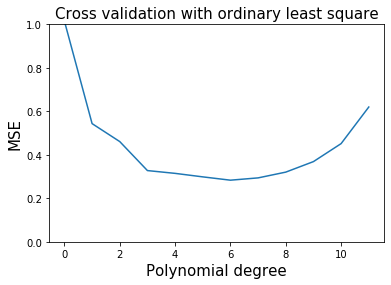

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Parameters
N = 20
maxdegree = 12
k = 10 #Number of folds
kfold = KFold(n_splits = k, shuffle=True, random_state=22) 

# Make dataset
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15)

mse_scikit_cv = False #Change to True to conduct cross-validation with scikit-learn

# Cost function
mse_ols_cvd = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

for i in range(maxdegree):
    degree = i
    polydegree[i] = degree
    X = create_X(x_flat, y_flat, degree)
    mse_split = np.zeros(k)
    cv_split = 0
    for train_indexes, test_indexes in kfold.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        z_train = z[train_indexes]
        z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)

        beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        z_pred = X_test @ beta
        
        mse_split[cv_split] = mean_squared_error(z_test, z_pred)
        
        cv_split += 1
    
    mse_ols_cvd[i] = np.mean(mse_split)
    
    #Compare with scikit-learn
    linreg = LinearRegression()
    mse_scikit_cv = np.mean(cross_val_score(linreg, X, z, scoring='neg_mean_squared_error', cv=kfold))

    
    if (mse_scikit_cv == True):
        print('degree: %i    MSE: %.6f    scikit mse: %.6f' %(degree, mse_ols_cvd[i], mse_scikit_cv))
    else:
        print('degree: %i    MSE: %.6f' %(degree, mse_ols_cvd[i]))

plt.plot(polydegree, mse_ols_cvd)
plt.ylim(0,1)
plt.title("Cross validation with ordinary least square")
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")
plt.show()    


#### 5.2. Comments <a class="anchor" id="5.2"></a>

The results from the bootstrap resampling and cross-validation does vary in value, but show the same pattern in the mean squared error. When increasing the datapoints to say 200, the values are only marginaly differnt from eachother. Changing the number of folds in the cross validation does not tremendously impact the results. The major difference beeing the smoothness and consistancy in the curve, as is expected when performing a larger set of tests, which would be identical to increasing/deacrasing the number of bootstraps in the bootstrap resampling method. 

### 6. Exercise 4 - Ridge regression on the Franke function with resampling
<a class="anchor" id="4"></a>

- Ridge: Shrinking beta-coefficients with large variance, but never to zero
- Lasso: Same, but can shrink to zero
- Noisy function means large variance
- To compare OLS/ridge/beta, try to compute coefficients and see with/without noise
- Beta coefficients in ridge are given by Gaussian distribution, in Lasso they are given by Laplace distribution (thats why they can go to zero)

- Scaling: Subtracting the mean value means first column of design matrix (1,1,1,...) becomes zero.

#### 6.1. Ridge regression with bootstrap and cross validation <a class="anchor" id="6.1"></a>

RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING


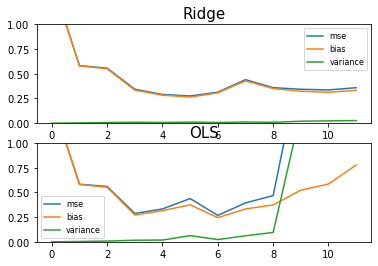

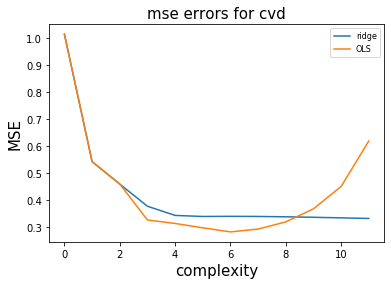

In [24]:
N = 20
np.random.seed(64)
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)

z = FrankeFunction(x_flat, y_flat, 0.15) 

#Bootstrap parameters
n_bootstraps = 1000
maxdegree = 12

#cross_validation parameters
k = 10
kfold = KFold(n_splits = k, shuffle=True, random_state=22)

polydegrees = np.zeros(maxdegree)

#Error arrays
mse_ridge_bootstrap = np.zeros(maxdegree)
mse_ols_bootstrap = np.zeros(maxdegree)

bias_ridge_bootstrap = np.zeros(maxdegree)
bias_ols_bootstrap = np.zeros(maxdegree)

variance_ridge_bootstrap = np.zeros(maxdegree)
variance_ols_bootstrap = np.zeros(maxdegree)

mse_ridge_cvd = np.zeros(maxdegree)
mse_ols_cvd = np.zeros(maxdegree)


lmd = 1

for i in range(maxdegree):
    print('RUNNING')
    degree = i
    polydegrees[i] = degree
    X = create_X(x_flat, y_flat, degree)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    #Bootstrap
    z_pred_ridge_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ols_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):

        x_bs,z_bs = resample(X_train,z_train)
        
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        
        beta_ridge_bootstrap = np.linalg.pinv(x_bs.T @ x_bs + lmd*I_) @ x_bs.T @ z_bs
        beta_ols_bootstrap = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        
        z_pred_ols_bootstrap[:,j] = X_test @ beta_ols_bootstrap
        z_pred_ridge_bootstrap[:,j] = X_test @ beta_ridge_bootstrap
        
    #Bootstrap errors
    mse_ridge_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_bootstrap)**2, axis=1, keepdims=True))
    mse_ols_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ols_bootstrap)**2, axis=1, keepdims=True))
    
    bias_ridge_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge_bootstrap, axis=1, keepdims=True))**2)
    bias_ols_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ols_bootstrap, axis=1, keepdims=True))**2)
    
    variance_ridge_bootstrap[i] = np.mean(np.var(z_pred_ridge_bootstrap, axis=1, keepdims=True))
    variance_ols_bootstrap[i] = np.mean(np.var(z_pred_ols_bootstrap, axis=1, keepdims=True)) 
    
    #Cross-validation
    cv_split = 0
    mse_ols_cvd_split = np.zeros(k)
    mse_ridge_cvd_split = np.zeros(k)
    for train_indexes, test_indexes in kfold.split(X):
        X_train = X[train_indexes]; X_test = X[test_indexes]
        z_train = z[train_indexes]; z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        
        beta_ols_cvd = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        z_pred_ols_cvd = X_test @ beta_ols_cvd
        
        beta_ridge_cvd = np.linalg.pinv(X_train.T @ X_train + lmd*I_) @ X_train.T @ z_train
        z_pred_ridge_cvd = X_test @ beta_ridge_cvd
        
        mse_ols_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ols_cvd)
        mse_ridge_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ridge_cvd)
    
        cv_split += 1
    
    # Cvd errors
    mse_ridge_cvd[i] = np.mean(mse_ridge_cvd_split)
    mse_ols_cvd[i] = np.mean(mse_ols_cvd_split)


# Plot results 
fig,ax = plt.subplots(2, sharey=True)
ax[0].plot(polydegrees, mse_ridge_bootstrap, label='mse')
ax[0].plot(polydegrees, bias_ridge_bootstrap, label='bias')
ax[0].plot(polydegrees, variance_ridge_bootstrap, label='variance')
ax[0].set_ylim(0,1)
ax[0].legend()
ax[0].set_title('Ridge')

ax[1].plot(polydegrees, mse_ols_bootstrap, label='mse')
ax[1].plot(polydegrees, bias_ols_bootstrap, label='bias')
ax[1].plot(polydegrees, variance_ols_bootstrap, label='variance')
ax[1].legend()
ax[1].set_title('OLS')
plt.show()

fig,ax = plt.subplots(1, sharey=True)
ax.plot(polydegrees, mse_ridge_cvd, label='ridge')
ax.plot(polydegrees, mse_ols_cvd, label='OLS')
ax.set_xlabel('complexity')
ax.set_ylabel('MSE')
ax.legend()
plt.title('mse errors for cvd')
plt.show()

#### 6.2. Discussion of lambda dependence <a class="anchor" id="6.2"></a>

#### 6.3. Discussion of bias-variance trade-off  <a class="anchor" id="6.3"></a>

### 7. Exercise 5 - Lasso Regression on the Franke function with resampling
<a class="anchor" id="7"></a>

#### 7.1. Lasso regression

Polynomial degree: 0
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.817199,0.817199,0.000000e+00
ridge,0.817199,0.817199,0.000000e+00
lasso,0.817199,0.817199,3.798227e-65




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.94069    0.94069    0.94069
Split: 2    0.86472    0.86472    0.86472
Split: 3    0.73613    0.73613    0.73613
Split: 4    1.09421    1.09421    1.09421
Split: 5    1.43658    1.43658    1.43658
 
Avg cvd OLS mse for polynomial degree 0: 1.01447
Avg cvd Ridge mse for polynomial degree 0: 1.01447
Avg cvd Lasso mse for polynomial degree 0: 1.01447
 
Polynomial degree: 1
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.516535,0.513978,2.557677e-03
ridge,0.516535,0.513978,2.557658e-03
lasso,0.513490,0.513490,5.826690e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.50481    0.50481    0.50469
Split: 2    0.40064    0.40064    0.40061
Split: 3    0.37554    0.37554    0.37543
Split: 4    0.52281    0.52281    0.52281
Split: 5    0.63852    0.63852    0.63882
 
Avg cvd OLS mse for polynomial degree 1: 0.48846
Avg cvd Ridge mse for polynomial degree 1: 0.48846
Avg cvd Lasso mse for polynomial degree 1: 0.48847
 
Polynomial degree: 2
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.416533,0.408474,8.058865e-03
ridge,0.416542,0.408484,8.057558e-03
lasso,0.416822,0.416822,5.963913e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.41381    0.41381    0.41285
Split: 2    0.29885    0.29885    0.30441
Split: 3    0.33230    0.33230    0.32934
Split: 4    0.41682    0.41681    0.41235
Split: 5    0.50880    0.50881    0.51550
 
Avg cvd OLS mse for polynomial degree 2: 0.39412
Avg cvd Ridge mse for polynomial degree 2: 0.39412
Avg cvd Lasso mse for polynomial degree 2: 0.39489
 
Polynomial degree: 3
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.336999,0.325947,1.105260e-02
ridge,0.336820,0.325816,1.100475e-02
lasso,0.323790,0.323790,7.350432e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.28007    0.28018    0.34722
Split: 2    0.29160    0.29120    0.26516
Split: 3    0.27290    0.27267    0.28062
Split: 4    0.31895    0.31908    0.36021
Split: 5    0.35305    0.35336    0.44656
 
Avg cvd OLS mse for polynomial degree 3: 0.30331
Avg cvd Ridge mse for polynomial degree 3: 0.30330
Avg cvd Lasso mse for polynomial degree 3: 0.33995
 
Polynomial degree: 4
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.249309,0.237500,1.180945e-02
ridge,0.248482,0.237766,1.071514e-02
lasso,0.274457,0.274457,7.189323e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.28112    0.27861    0.32156
Split: 2    0.27067    0.27313    0.26918
Split: 3    0.26436    0.26357    0.26976
Split: 4    0.33565    0.32728    0.34336
Split: 5    0.31265    0.31735    0.41970
 
Avg cvd OLS mse for polynomial degree 4: 0.29289
Avg cvd Ridge mse for polynomial degree 4: 0.29199
Avg cvd Lasso mse for polynomial degree 4: 0.32471
 
Polynomial degree: 5
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.284253,0.267027,1.722598e-02
ridge,0.260660,0.245862,1.479790e-02
lasso,0.254204,0.254204,1.802520e-32




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.26146    0.26986    0.30906
Split: 2    0.23776    0.25756    0.27416
Split: 3    0.26399    0.27189    0.26778
Split: 4    0.32012    0.32928    0.33928
Split: 5    0.30177    0.32766    0.41504
 
Avg cvd OLS mse for polynomial degree 5: 0.27702
Avg cvd Ridge mse for polynomial degree 5: 0.29125
Avg cvd Lasso mse for polynomial degree 5: 0.32107
 
Polynomial degree: 6
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.265536,0.239313,2.622225e-02
ridge,0.217147,0.202438,1.470909e-02
lasso,0.221022,0.221022,9.015195e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.27165    0.26669    0.30960
Split: 2    0.26817    0.25016    0.27684
Split: 3    0.26205    0.27217    0.26659
Split: 4    0.32530    0.32250    0.34168
Split: 5    0.30092    0.32232    0.41353
 
Avg cvd OLS mse for polynomial degree 6: 0.28562
Avg cvd Ridge mse for polynomial degree 6: 0.28677
Avg cvd Lasso mse for polynomial degree 6: 0.32165
 
Polynomial degree: 7
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.360344,0.322521,3.782331e-02
ridge,0.345265,0.328994,1.627120e-02
lasso,0.365824,0.365824,1.039341e-32




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.25973    0.26853    0.31441
Split: 2    0.26246    0.24671    0.27697
Split: 3    0.26175    0.26706    0.26551
Split: 4    0.33431    0.31743    0.34699
Split: 5    0.33678    0.31976    0.41953
 
Avg cvd OLS mse for polynomial degree 7: 0.29100
Avg cvd Ridge mse for polynomial degree 7: 0.28390
Avg cvd Lasso mse for polynomial degree 7: 0.32468
 
Polynomial degree: 8
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.273126,0.228761,4.436452e-02
ridge,0.256006,0.241412,1.459419e-02
lasso,0.303308,0.303308,1.002838e-32




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.28207    0.26954    0.31793
Split: 2    0.25025    0.24517    0.27598
Split: 3    0.27061    0.26311    0.26643
Split: 4    0.34416    0.31651    0.35028
Split: 5    0.32051    0.31895    0.42416
 
Avg cvd OLS mse for polynomial degree 8: 0.29352
Avg cvd Ridge mse for polynomial degree 8: 0.28266
Avg cvd Lasso mse for polynomial degree 8: 0.32695
 
Polynomial degree: 9
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.572715,0.349701,2.230145e-01
ridge,0.336944,0.312073,2.487139e-02
lasso,0.372102,0.372102,8.966455e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.27844    0.26917    0.32157
Split: 2    0.25343    0.24480    0.27402
Split: 3    0.28413    0.26271    0.26514
Split: 4    0.34668    0.31961    0.35127
Split: 5    0.33244    0.32046    0.42825
 
Avg cvd OLS mse for polynomial degree 9: 0.29902
Avg cvd Ridge mse for polynomial degree 9: 0.28335
Avg cvd Lasso mse for polynomial degree 9: 0.32805
 
Polynomial degree: 10
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.384919,0.242337,1.425821e-01
ridge,0.262034,0.242002,2.003217e-02
lasso,0.318529,0.318529,1.119282e-32




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.26924    0.26826    0.32317
Split: 2    0.45270    0.24533    0.27298
Split: 3    0.29362    0.26450    0.26397
Split: 4    0.33572    0.32483    0.34856
Split: 5    0.33126    0.32233    0.42719
 
Avg cvd OLS mse for polynomial degree 10: 0.33651
Avg cvd Ridge mse for polynomial degree 10: 0.28505
Avg cvd Lasso mse for polynomial degree 10: 0.32717
 
Polynomial degree: 11
Bootstrap


,mse,bias,variance
regression type,,,
OLS,0.496654,0.276794,2.198601e-01
ridge,0.271103,0.247007,2.409634e-02
lasso,0.271148,0.271148,8.055578e-33




Cross-validation mse errors
             ols        ridge     lasso
Split: 1    0.26295    0.26775    0.32168
Split: 2    0.60389    0.24642    0.27319
Split: 3    0.28475    0.26607    0.26381
Split: 4    0.33841    0.33005    0.34694
Split: 5    0.37561    0.32324    0.42613
 
Avg cvd OLS mse for polynomial degree 11: 0.37312
Avg cvd Ridge mse for polynomial degree 11: 0.28671
Avg cvd Lasso mse for polynomial degree 11: 0.32635
 


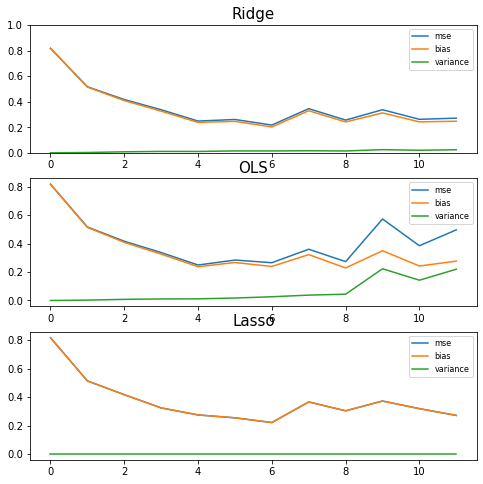

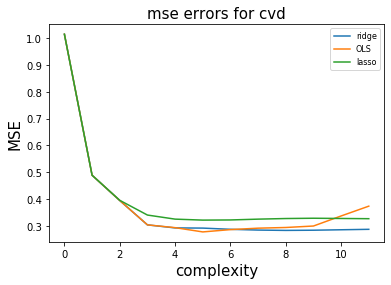

In [21]:
from sklearn.linear_model import Lasso

# Make data
N = 20
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
np.random.seed(64)

z = FrankeFunction(x_flat, y_flat, 0.15) 

# Bootstrap parameters
n_bootstraps = 50
maxdegree = 12

# Cross-validation parameters
k = 5
kfold = KFold(n_splits = k, shuffle=True, random_state=22)

polydegrees = np.zeros(maxdegree)

#Error arrays

# Bootstrap
mse_ols_bootstrap = np.zeros(maxdegree)
mse_ridge_bootstrap = np.zeros(maxdegree)
mse_lasso_bootstrap = np.zeros(maxdegree)

bias_ols_bootstrap = np.zeros(maxdegree)
bias_ridge_bootstrap = np.zeros(maxdegree)
bias_lasso_bootstrap = np.zeros(maxdegree)

variance_ols_bootstrap = np.zeros(maxdegree)
variance_ridge_bootstrap = np.zeros(maxdegree)
variance_lasso_bootstrap = np.zeros(maxdegree)

# cvd
mse_ols_cvd = np.zeros(maxdegree)
mse_ridge_cvd = np.zeros(maxdegree)
mse_lasso_cvd = np.zeros(maxdegree)

lmd = 0.001
for i in range(maxdegree):
    degree = i
    polydegrees[i] = degree
    print("Polynomial degree: %i" %(i))
    
    X = create_X(x_flat, y_flat, degree)
    
    

    # Bootstrap
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
    
    z_pred_ridge_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_ols_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    z_pred_lasso_bootstrap = np.empty((z_test.shape[0], n_bootstraps))
    
    print("Bootstrap")
    for j in range(n_bootstraps):
        x_bs,z_bs = resample(X_train,z_train)
        
        beta_ols_bootstrap = np.linalg.pinv(x_bs.T @ x_bs) @ x_bs.T @ z_bs
        beta_ridge_bootstrap = np.linalg.pinv(x_bs.T @ x_bs + lmd*np.eye(x_bs.shape[1],x_bs.shape[1])) @ x_bs.T @ z_bs
        
        z_pred_ols_bootstrap[:,j] = X_test @ beta_ols_bootstrap
        z_pred_ridge_bootstrap[:,j] = X_test @ beta_ridge_bootstrap
        
        reglasso_bootstrap = Lasso(lmd, max_iter=1e5, tol=0.1)
        reglasso_bootstrap.fit(X_train, z_train)
        z_pred_lasso_bootstrap[:,j] = reglasso_bootstrap.predict(X_test)
    
    
    mse_ols_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ols_bootstrap)**2, axis=1, keepdims=True))
    mse_ridge_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_ridge_bootstrap)**2, axis=1, keepdims=True))
    mse_lasso_bootstrap[i] = np.mean(np.mean((z_test.reshape(-1,1) - z_pred_lasso_bootstrap)**2, axis=1, keepdims=True))
    
    bias_ols_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ols_bootstrap, axis=1, keepdims=True))**2)
    bias_ridge_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_ridge_bootstrap, axis=1, keepdims=True))**2)
    bias_lasso_bootstrap[i] = np.mean((z_test.reshape(-1,1) - np.mean(z_pred_lasso_bootstrap, axis=1, keepdims=True))**2)
    
    variance_ols_bootstrap[i] = np.mean(np.var(z_pred_ols_bootstrap, axis=1, keepdims=True))
    variance_ridge_bootstrap[i] = np.mean(np.var(z_pred_ridge_bootstrap, axis=1, keepdims=True))
    variance_lasso_bootstrap[i] = np.mean(np.var(z_pred_lasso_bootstrap, axis=1, keepdims=True))
    
    # Table for displaying mse, bias and variance for the different regression methods
    table = pd.DataFrame({'regression type': ['OLS', 'ridge', 'lasso'],\
                          'mse': [mse_ols_bootstrap[i], mse_ridge_bootstrap[i], mse_lasso_bootstrap[i]], \
                          'bias': [bias_ols_bootstrap[i], bias_ridge_bootstrap[i], bias_lasso_bootstrap[i]], \
                          'variance':[variance_ols_bootstrap[i], variance_ridge_bootstrap[i], variance_lasso_bootstrap[i]]})
    table = table.set_index('regression type')
    display(table)
    print("")
    """
    print("OLS     %.5f     %.5f     %.5f"\
          %(mse_ols_bootstrap[i],bias_ols_bootstrap[i],variance_ols_bootstrap[i]))
    
    print("Ridge   %.5f     %.5f     %.5f"\
          %(mse_ridge_bootstrap[i],bias_ridge_bootstrap[i],variance_ridge_bootstrap[i]))
   
    print("Lasso   %.5f     %.5f     %.5f"\
          %(mse_lasso_bootstrap[i],bias_lasso_bootstrap[i],variance_lasso_bootstrap[i]))
    """
    
    # cvd
    cv_split = 0
    mse_ols_cvd_split = np.zeros(k)
    mse_ridge_cvd_split = np.zeros(k)
    mse_lasso_cvd_split = np.zeros(k)
    
    print("")
    print("Cross-validation mse errors")
    print("             ols        ridge     lasso")
    for train_indexes, test_indexes in kfold.split(X):
        
        # Split and scale
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        z_train = z[train_indexes]
        z_test = z[test_indexes]
        X_train, X_test, z_train, z_test = scale(X_train, X_test, z_train, z_test)
        
        # Make beta
        I_ = np.eye(X_train.shape[1], X_train.shape[1])
        beta_ols_cvd = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
        beta_ridge_cvd = np.linalg.pinv(X_train.T @ X_train + lmd*I_) @ X_train.T @ z_train
        
        # Predictions
        z_pred_ols_cvd = X_test @ beta_ols_cvd
        z_pred_ridge_cvd = X_test @ beta_ridge_cvd
        
        reglasso_cvd = Lasso(lmd, max_iter=1e5, tol=0.1)
        reglasso_cvd.fit(X_train, z_train)
        z_pred_lasso_cvd = reglasso_cvd.predict(X_test)
        
        # Errors
        mse_ols_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ols_cvd)
        mse_ridge_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_ridge_cvd)
        mse_lasso_cvd_split[cv_split] = mean_squared_error(z_test, z_pred_lasso_cvd)
        
        print("Split: %i    %.5f    %.5f    %.5f"\
              %(cv_split+1, mse_ols_cvd_split[cv_split], mse_ridge_cvd_split[cv_split]\
                ,mse_lasso_cvd_split[cv_split]))
        
        
        cv_split += 1
    
    # Cvd errors
    mse_ridge_cvd[i] = np.mean(mse_ridge_cvd_split)
    mse_ols_cvd[i] = np.mean(mse_ols_cvd_split)
    mse_lasso_cvd[i] = np.mean(mse_lasso_cvd_split)
    
    print(" ")
    print("Avg cvd OLS mse for polynomial degree %i: %.5f" %(degree, mse_ols_cvd[i]))
    print("Avg cvd Ridge mse for polynomial degree %i: %.5f" %(degree, mse_ridge_cvd[i]))
    print("Avg cvd Lasso mse for polynomial degree %i: %.5f" %(degree, mse_lasso_cvd[i]))
    print(" ")
    

# Bootstrap plots
fig,ax = plt.subplots(3,figsize=(8,8))
ax[0].plot(polydegrees, mse_ridge_bootstrap, label='mse')
ax[0].plot(polydegrees, bias_ridge_bootstrap, label='bias')
ax[0].plot(polydegrees, variance_ridge_bootstrap, label='variance')
ax[0].set_ylim(0,1)
ax[0].legend()
ax[0].set_title('Ridge')

ax[1].plot(polydegrees, mse_ols_bootstrap, label='mse')
ax[1].plot(polydegrees, bias_ols_bootstrap, label='bias')
ax[1].plot(polydegrees, variance_ols_bootstrap, label='variance')
ax[1].legend()
ax[1].set_title('OLS')

ax[2].plot(polydegrees, mse_lasso_bootstrap, label='mse')
ax[2].plot(polydegrees, bias_lasso_bootstrap, label='bias')
ax[2].plot(polydegrees, variance_lasso_bootstrap, label='variance')
ax[2].legend()
ax[2].set_title('Lasso')

# cvd plot
fig,ax = plt.subplots(1)
ax.plot(polydegrees, mse_ridge_cvd, label='ridge')
ax.plot(polydegrees, mse_ols_cvd, label='OLS')
ax.plot(polydegrees, mse_lasso_cvd, label='lasso')
ax.set_xlabel('complexity')
ax.set_ylabel('MSE')
ax.legend()
plt.title('mse errors for cvd')

plt.show()

#### 7.2. Evaluation of methods  <a class="anchor" id="7.2"></a>

# References 
- [Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)